# **Bar Charts**


## Objectives


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-05-17 16:53:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  71.4MB/s    in 2.1s    

2025-05-17 16:53:56 (71.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



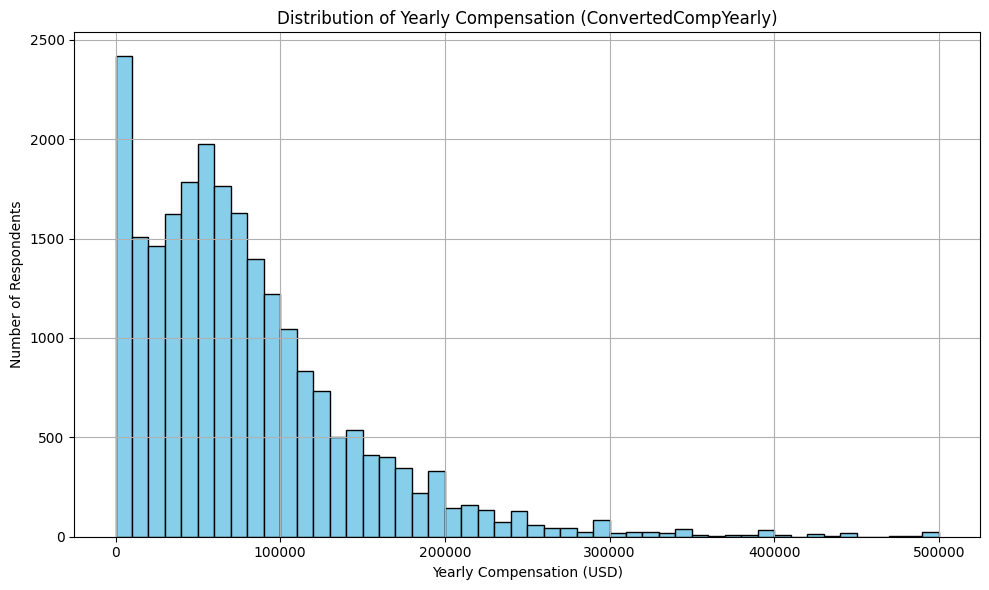

In [ ]:
## Write your code here
# Drop missing or non-numeric compensation values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp_data = df['ConvertedCompYearly'].dropna()

# Optional: Remove outliers above $500,000 to reduce skew
comp_data = comp_data[comp_data <= 500000]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



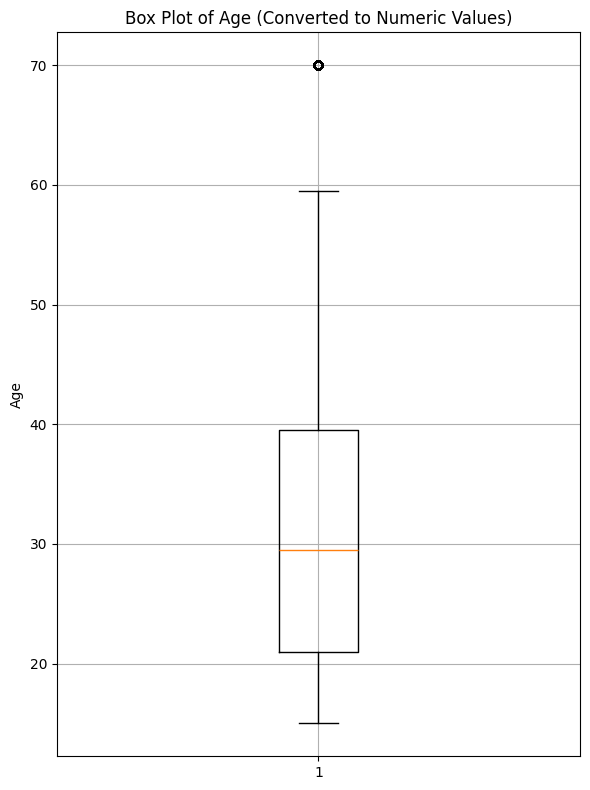

In [ ]:
## Write your code here
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Create a new numeric age column
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop NaN values
age_data = df['AgeNumeric'].dropna()

# Plot box plot
plt.figure(figsize=(6, 8))
plt.boxplot(age_data, vert=True)
plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



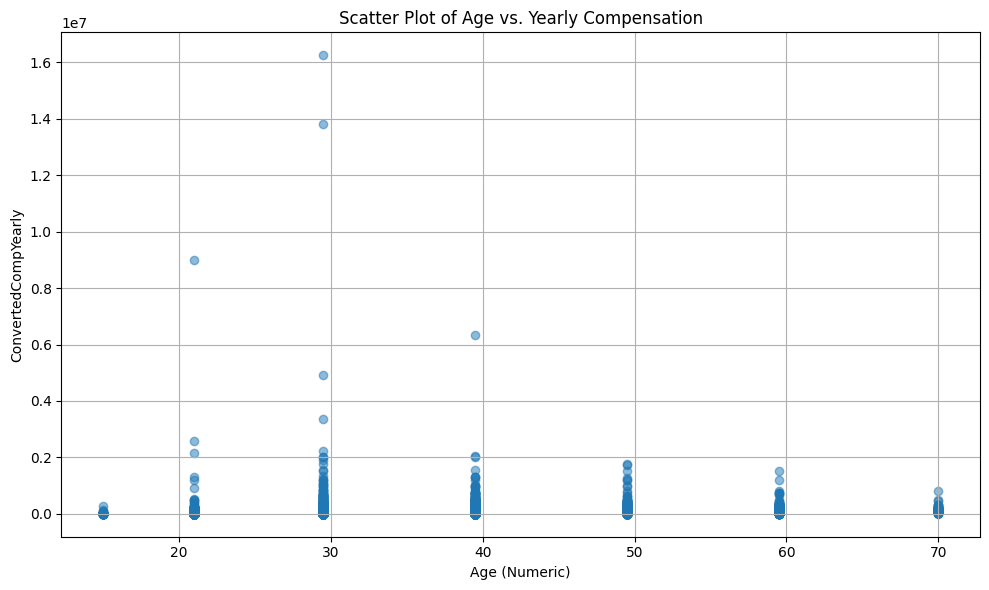

In [ ]:
## Write your code here
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age'].map(age_map)

# Step 2: Drop rows with missing age or compensation
filtered_df = df[['Age_numeric', 'ConvertedCompYearly']].dropna()

# Step 3: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age_numeric'], filtered_df['ConvertedCompYearly'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('ConvertedCompYearly')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


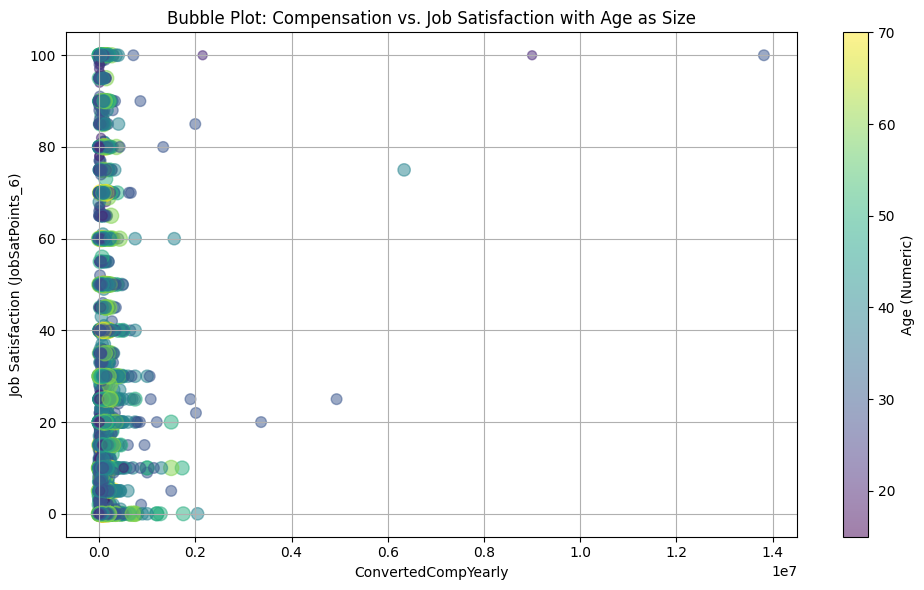

In [ ]:
## Write your code here
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_map)

# Filter required columns
bubble_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['Age_numeric'] * 2,  # Bubble size
    alpha=0.5,
    c=bubble_df['Age_numeric'],
    cmap='viridis'
)
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction with Age as Size')
plt.colorbar(label='Age (Numeric)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



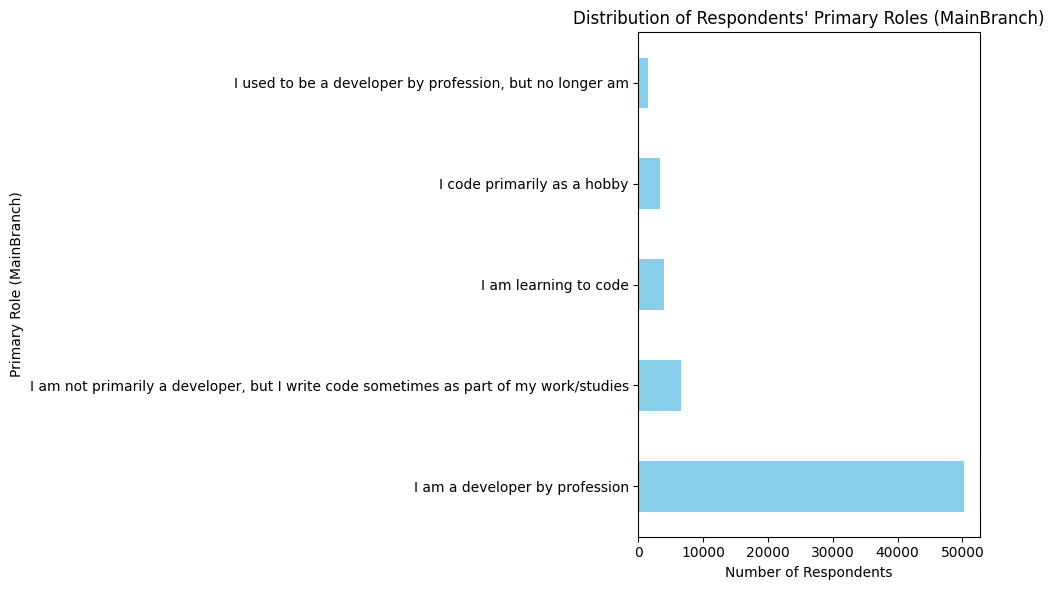

In [ ]:
## Write your code here
mainbranch_distribution = df['MainBranch'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_distribution.plot(kind='barh', color='skyblue')
plt.title('Distribution of Respondents\' Primary Roles (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role (MainBranch)')
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



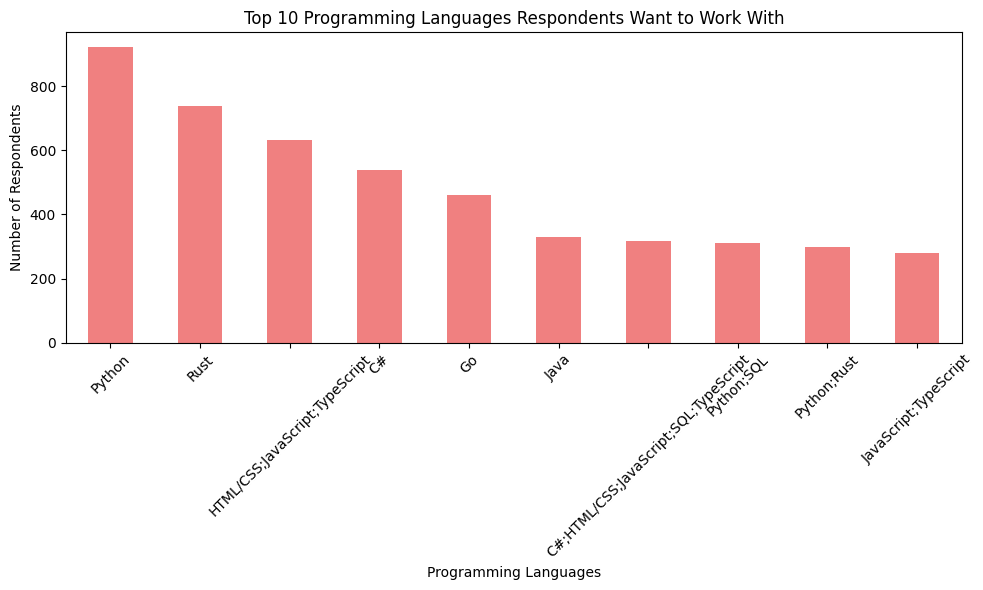

In [ ]:
## Write your code here
# Get the top 5 most desired languages
top_languages = df['LanguageWantToWorkWith'].value_counts().head(10)

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


<Figure size 1000x600 with 0 Axes>

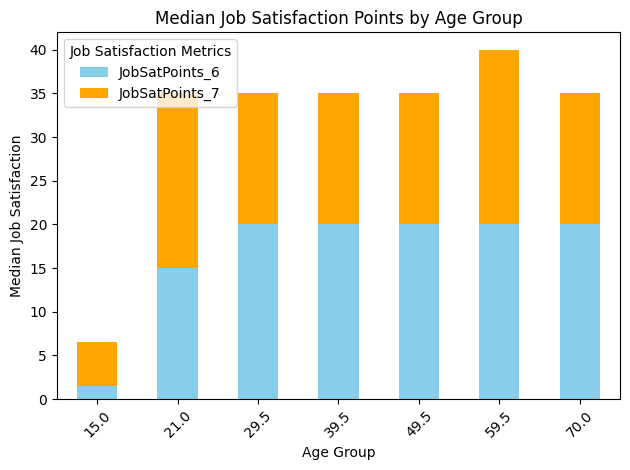

In [ ]:
## Write your code here
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_map)

# Filter required columns
stacked_df = df[['Age_numeric', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

median_job_sat = df.groupby('Age_numeric')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
median_job_sat.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Median Job Satisfaction Points by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



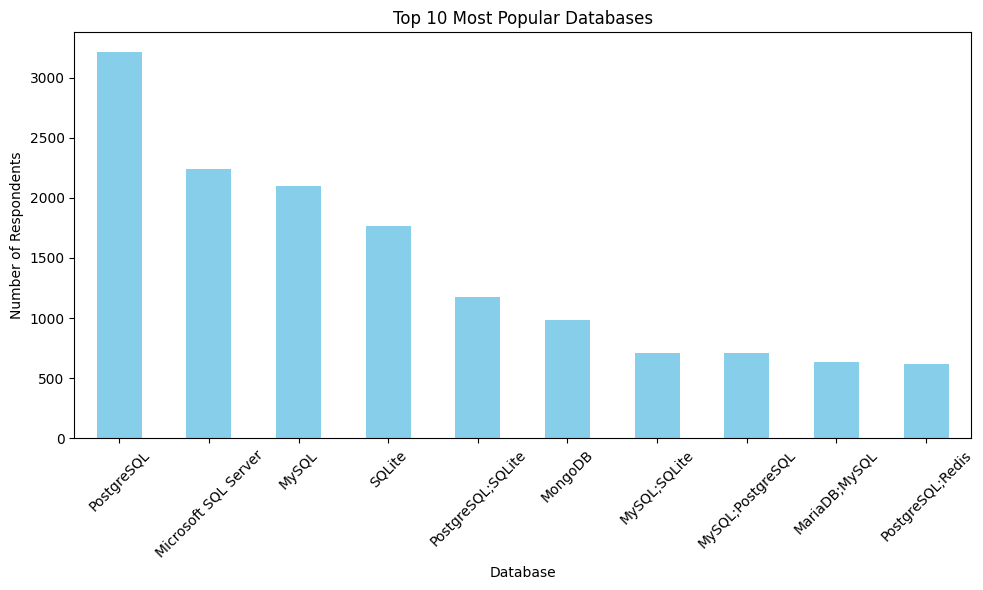

In [ ]:
## Write your code here

# Count the frequency of each database
database_counts = df['DatabaseHaveWorkedWith'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
database_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



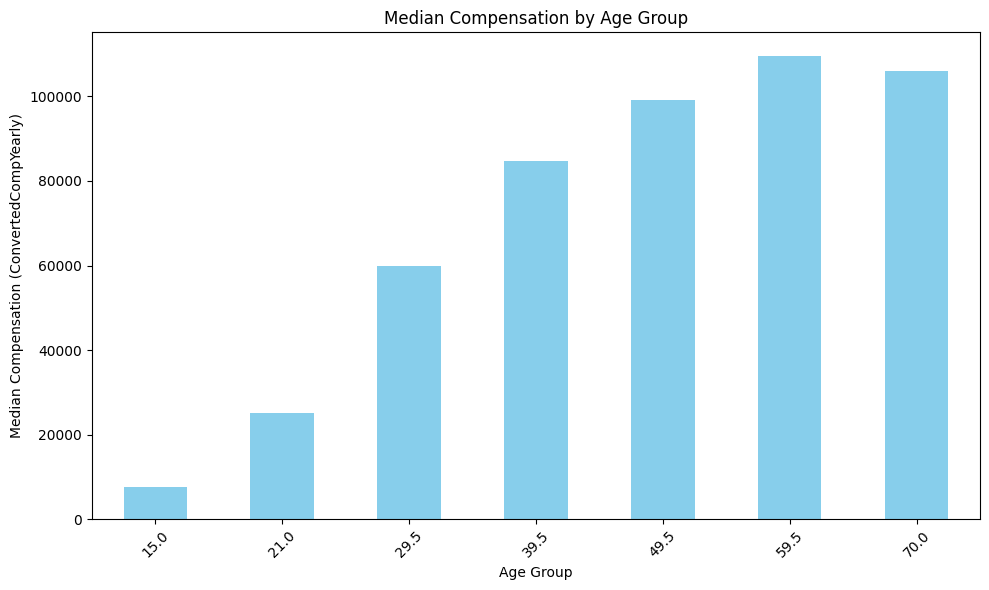

In [ ]:
## Write your code here
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_map)

# Filter required columns
bar_df = df[['Age_numeric', 'ConvertedCompYearly']].dropna()

median_compensation = df.groupby('Age_numeric')['ConvertedCompYearly'].median()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
median_compensation.plot(kind='bar', color='skyblue')
plt.title('Median Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



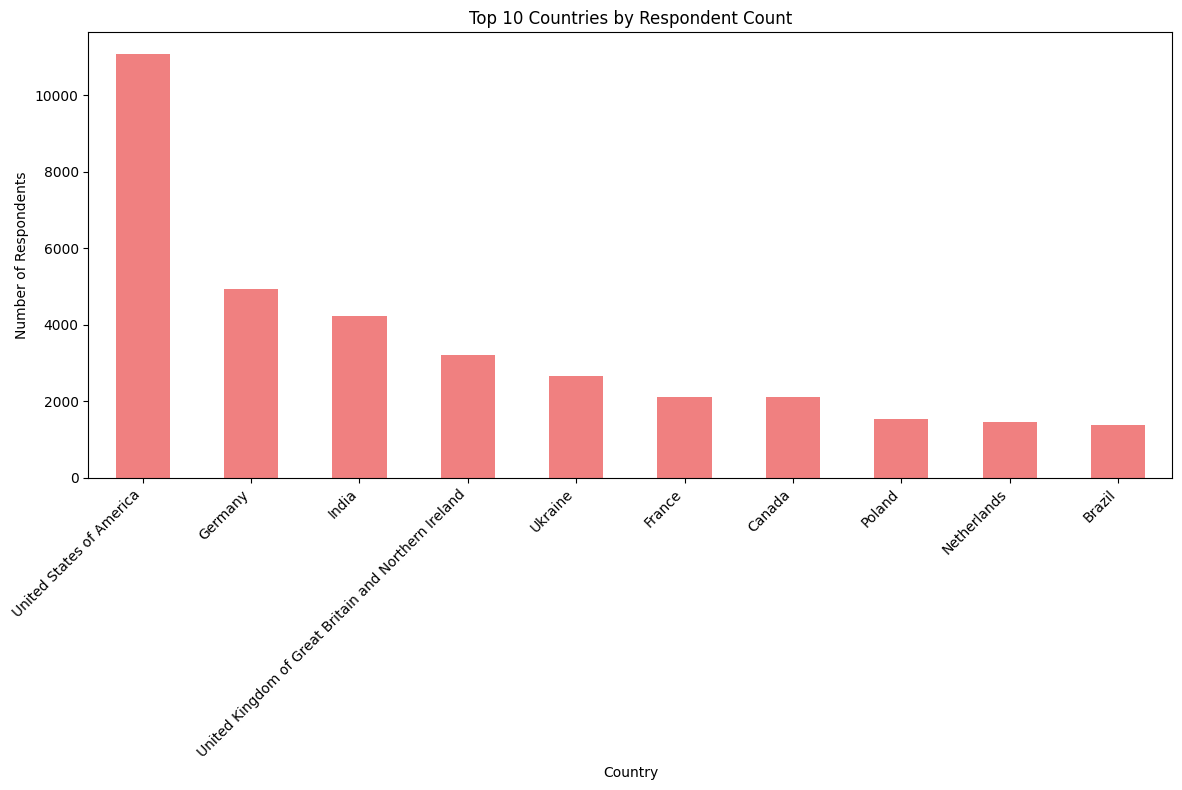

In [ ]:
## Write your code here
country_counts = df['Country'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
country_counts.head(10).plot(kind='bar', color='lightcoral')  # Displaying the top 10 countries
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.
